In [1]:
import numpy as np 
import pandas as pd

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#reading the dataset
pokemon_df = pd.read_csv("pokemon.csv")

In [4]:
#basic info of dataset
df2 = pokemon_df.select_dtypes(include = ['float64', 'int64'])
df3 = pokemon_df.select_dtypes(include = ['object'])
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
abilities            801 non-null object
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness    

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 35 columns):
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness       801 non-null int64
base_total         

In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 6 columns):
abilities        801 non-null object
classfication    801 non-null object
japanese_name    801 non-null object
name             801 non-null object
type1            801 non-null object
type2            417 non-null object
dtypes: object(6)
memory usage: 37.6+ KB


In [7]:
df3.head()

,abilities,classfication,japanese_name,name,type1,type2
0,"['Overgrow', 'Chlorophyll']",Seed Pokémon,Fushigidaneフシギダネ,Bulbasaur,grass,poison
1,"['Overgrow', 'Chlorophyll']",Seed Pokémon,Fushigisouフシギソウ,Ivysaur,grass,poison
2,"['Overgrow', 'Chlorophyll']",Seed Pokémon,Fushigibanaフシギバナ,Venusaur,grass,poison
3,"['Blaze', 'Solar Power']",Lizard Pokémon,Hitokageヒトカゲ,Charmander,fire,NaN
4,"['Blaze', 'Solar Power']",Flame Pokémon,Lizardoリザード,Charmeleon,fire,NaN


In [8]:
## from preprocessing, use LabelEncoder, we want to encode 
from sklearn import preprocessing 
le = preprocessing.LabelEncoder() 
labels = le.fit_transform(pokemon_df['type1'])
print(len(le.classes_)) 
print(le.classes_)

18
['bug' 'dark' 'dragon' 'electric' 'fairy' 'fighting' 'fire' 'flying'
 'ghost' 'grass' 'ground' 'ice' 'normal' 'poison' 'psychic' 'rock' 'steel'
 'water']


water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
poison       32
ground       32
dark         29
fighting     28
dragon       27
ghost        27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64

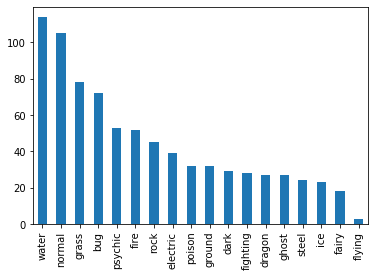

In [9]:
pokemon_df.type1.value_counts().plot.bar()
pokemon_df.type1.value_counts() 

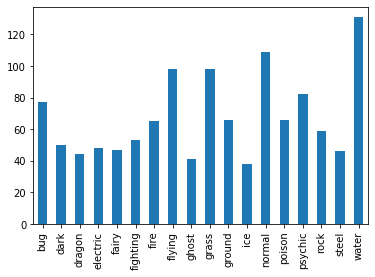

In [10]:
## Now there's a lot more flying types, so let's combine them
pokemon_df.type1.value_counts() + pokemon_df.type2.value_counts()

## and the accurate plot, keep in mind not every pokemon has 2 types
(pokemon_df.type1.value_counts() + pokemon_df.type2.value_counts()).plot.bar()

In [11]:
pokemon_df['type2'].fillna(value='None', inplace=True) 

In [12]:
abilitiesList = []
for n in range(len(pokemon_df.abilities)):
    for ability in pokemon_df.abilities.iloc[n]:
        if ability not in abilitiesList:
            abilitiesList.append(ability)
            
print('Number of unique abilities: ', len(abilitiesList))

Number of unique abilities:  56


In [13]:
data = {
    'attack': pokemon_df['attack'],
    'defense': pokemon_df['defense'],
    'sp_attack': pokemon_df['sp_attack'],
    'sp_defense': pokemon_df['sp_defense'],
    'type2': pokemon_df.type2,
    'type1': pokemon_df['type1']
}
data = pd.DataFrame(data)
## look for columns with 'against' and join them
data = pokemon_df.filter(like='against').join(data) 

X = data.drop('type1', axis=1)
y = data['type1']
print(list(X))
X

['against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water', 'attack', 'defense', 'sp_attack', 'sp_defense', 'type2']


,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,against_poison,against_psychic,against_rock,against_steel,against_water,attack,defense,sp_attack,sp_defense,type2
0,1.00,1.0,1.0,0.5,0.5,0.50,2.00,2.00,1.0,0.25,...,1.00,2.00,1.0,1.00,0.5,49,49,65,65,poison
1,1.00,1.0,1.0,0.5,0.5,0.50,2.00,2.00,1.0,0.25,...,1.00,2.00,1.0,1.00,0.5,62,63,80,80,poison
2,1.00,1.0,1.0,0.5,0.5,0.50,2.00,2.00,1.0,0.25,...,1.00,2.00,1.0,1.00,0.5,100,123,122,120,poison
3,0.50,1.0,1.0,1.0,0.5,1.00,0.50,1.00,1.0,0.50,...,1.00,1.00,2.0,0.50,2.0,52,43,60,50,None
4,0.50,1.0,1.0,1.0,0.5,1.00,0.50,1.00,1.0,0.50,...,1.00,1.00,2.0,0.50,2.0,64,58,80,65,None
5,0.25,1.0,1.0,2.0,0.5,0.50,0.50,1.00,1.0,0.25,...,1.00,1.00,4.0,0.50,2.0,104,78,159,115,flying
6,1.00,1.0,1.0,2.0,1.0,1.00,0.50,1.00,1.0,2.00,...,1.00,1.00,1.0,0.50,0.5,48,65,50,64,None
7,1.00,1.0,1.0,2.0,1.0,1.00,0.50,1.00,1.0,2.00,...,1.00,1.00,1.0,0.50,0.5,63,80,65,80,None
8,1.00,1.0,1.0,2.0,1.0,1.00,0.50,1.00,1.0,2.00,...,1.00,1.00,1.0,0.50,0.5,103,120,135,115,None
9,1.00,1.0,1.0,1.0,1.0,0.50,2.00,2.00,1.0,0.50,...,1.00,1.00,2.0,1.00,1.0,30,35,20,20,None


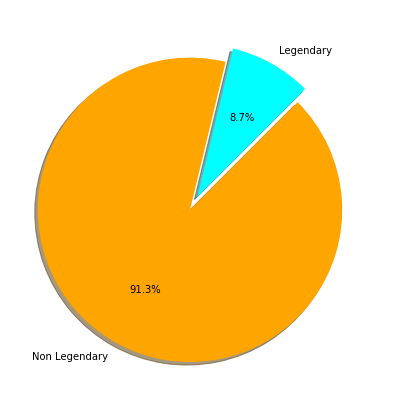

In [14]:

fig = plt.figure(figsize=(7,7))

colors = ["aqua", "orange"]
pokeLeg = pokemon_df[pokemon_df['is_legendary'] == True]
pokeNon = pokemon_df[pokemon_df['is_legendary'] == False]

legDist = [pokeLeg['name'].count(), pokeNon['name'].count()]
legPie = plt.pie(legDist,
                 labels= ['Legendary', 'Non Legendary'], 
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

C:\Users\singh\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\singh\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


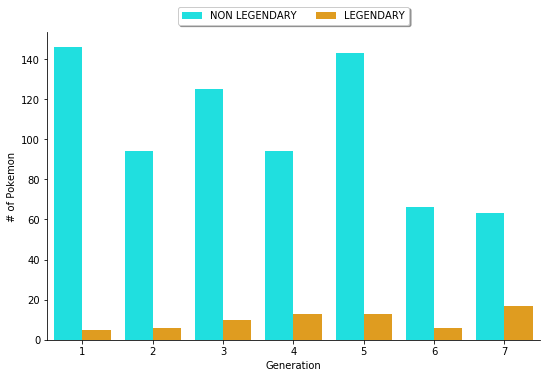

In [15]:
## correlation between legendary pokemon and non-legendary per generation
colors = ["aqua", "orange"]
g = sns.factorplot(
    x='generation', 
    data=pokemon_df,
    kind='count', 
    hue='is_legendary',
    palette=colors, 
    size=5, 
    aspect=1.5,
    legend=False,
    ).set_axis_labels('Generation', '# of Pokemon')

g.ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),  shadow=True, ncol=2, labels=['NON LEGENDARY','LEGENDARY'])
plt.show()

In [16]:
## Not usually a good sign since there is not enough data on what is a legendary
## Maybe there's a very strong correlation we can exploit
## High attack and defense correlation

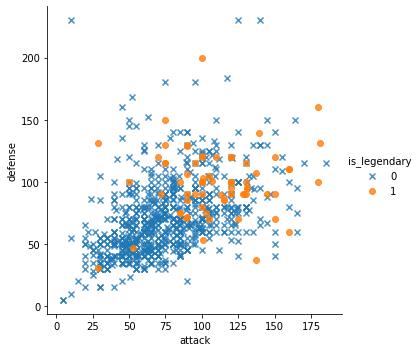

In [17]:
sns.lmplot(x='attack', y='defense', hue='is_legendary', fit_reg=False, data=pokemon_df, markers = ['x', 'o'])

In [18]:
leg = pokemon_df[pokemon_df['is_legendary'] == True]
leg_total = leg['base_total'].mean()
non_leg_total = pokemon_df[pokemon_df['is_legendary'] != True]['base_total'].mean()

In [19]:
pd.DataFrame([leg_total, non_leg_total], index=['Legendary', 'non-Legendary'], columns=['Average Total'])

,Average Total
Legendary,615.257143
non-Legendary,410.481532


In [20]:
isLegendary = pd.get_dummies(pokemon_df['is_legendary'], drop_first=True)
lr_df = pokemon_df[['base_total', 'capture_rate']]
lr_df = pd.concat([lr_df, isLegendary], axis=1)

In [21]:
lr_df.columns = ['Base Total', 'Catch Rate', 'Is Legendary']
lr_df.head()

,Base Total,Catch Rate,Is Legendary
0,318,45,0
1,405,45,0
2,625,45,0
3,309,45,0
4,405,45,0


In [22]:
lr_df.tail()

,Base Total,Catch Rate,Is Legendary
796,570,25,1
797,570,255,1
798,570,15,1
799,600,3,1
800,600,3,1


In [23]:
X = lr_df.drop('Is Legendary', axis = 1)
y = lr_df['Is Legendary']

In [24]:
#trying to predict the is legendary from base total and catch rate

In [25]:
#catboost implementation
import matplotlib as mp
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_auc_score

from catboost import Pool,CatBoostClassifier
from catboost import CatBoostRegressor

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [27]:
params = {'num_leaves':150, 'objective':'binary','max_depth':7,'learning_rate':.05,'max_bin':200}
params['metric'] = ['auc', 'binary_logloss']
num_round=50

In [28]:
cat_features = np.where(x_train.dtypes!=int)[0]
model=CatBoostRegressor(iterations=50, depth=3, learning_rate=0.1, loss_function='RMSE')#50 times learn

In [29]:
from datetime import datetime
t1=datetime.now()
model.fit(x_train,y_train,cat_features = cat_features)
t2=datetime.now()
execution_time_cat_boost = t2-t1
#ypred2=lgbm.predict(x_test)
t3 = datetime.now()
pred = model.predict(x_train)
t4 = datetime.now()
#print(ypred2.head())
# Total 284807 values

#accuracy = accuracy_score(ypred2,y_test)
accuracy_cat_boost = roc_auc_score(y_train,pred)
print("AUC Score = ",accuracy_cat_boost*100)
print("Execution time = ",execution_time_cat_boost)
print("Prediction time = ",t4-t3)
cat_boost_train_time = t2-t1


0:	learn: 0.2688860	total: 62.1ms	remaining: 3.04s
1:	learn: 0.2543839	total: 63.2ms	remaining: 1.52s
2:	learn: 0.2421247	total: 64.1ms	remaining: 1s
3:	learn: 0.2312319	total: 74.1ms	remaining: 852ms
4:	learn: 0.2223402	total: 85.2ms	remaining: 767ms
5:	learn: 0.2142922	total: 86.2ms	remaining: 632ms
6:	learn: 0.2077815	total: 87.1ms	remaining: 535ms
7:	learn: 0.2008788	total: 88.2ms	remaining: 463ms
8:	learn: 0.1937272	total: 89.7ms	remaining: 409ms
9:	learn: 0.1879677	total: 90.7ms	remaining: 363ms
10:	learn: 0.1833920	total: 91.7ms	remaining: 325ms
11:	learn: 0.1789295	total: 92.6ms	remaining: 293ms
12:	learn: 0.1749154	total: 93.5ms	remaining: 266ms
13:	learn: 0.1718026	total: 94.5ms	remaining: 243ms
14:	learn: 0.1692636	total: 95.4ms	remaining: 223ms
15:	learn: 0.1667268	total: 96.2ms	remaining: 205ms
16:	learn: 0.1648187	total: 97.1ms	remaining: 189ms
17:	learn: 0.1627179	total: 98ms	remaining: 174ms
18:	learn: 0.1612639	total: 99ms	remaining: 162ms
19:	learn: 0.1598040	total: 1

In [30]:
#xgboost implementation
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [31]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [32]:
model = XGBClassifier()
kfold = StratifiedKFold(n_splits=10, random_state=7)
scoring = 'roc_auc'

In [33]:
t1=datetime.now()
results = cross_val_score(model, X, y, cv=kfold, scoring = scoring)
t2=datetime.now()
print( "AUC: %.3f (%.3f)" % (results.mean(), results.std()) )
print("Training time = ",t2-t1)
accuracy_xgb = results.mean()
xgb_train_time = t2-t1

AUC: 0.972 (0.066)
Training time =  0:00:00.660598


In [34]:
#lightboost implementation
from sklearn.metrics import accuracy_score 
import lightgbm as lgb

In [35]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [36]:
train_data=lgb.Dataset(x_train,label=y_train)
params = {'num_leaves':150, 'objective':'binary','max_depth':7,'learning_rate':.05,'max_bin':200}
params['metric'] = ['auc', 'binary_logloss']
num_round=50

In [37]:
t1=datetime.now()
lgbm=lgb.train(params,train_data,num_round)
t2=datetime.now()
t3 = datetime.now()
ypred2=lgbm.predict(x_test)
t4 = datetime.now()

In [38]:
#we need to make the ypred of int format
for i in range(0,241): ## 30% ##
    if ypred2[i] >=0.5:
        ypred2[i] = 1
    else:
        ypred2[i] = 0

In [39]:
ypred2

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [40]:
accuracy_lgbm = accuracy_score(ypred2,y_test)

In [41]:
execution_time_lgbm = t2-t1
print("Accuracy score = ",accuracy_lgbm*100,"%")
print("Execution time = ",execution_time_lgbm)
print("Prediction time = ",t4-t3)
lgbm_train_time = t2-t1

Accuracy score =  97.9253112033195 %
Execution time =  0:00:00.049551
Prediction time =  0:00:00.005883


In [42]:
#comparison of the 3 boosting algorithms